<a href="https://colab.research.google.com/github/Himanshu-sharmaonline/Hands-On-work/blob/main/Kaggle/digit_recognizer_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshukumarsharma","key":"fa5ee604878d59cd89053ba9b5d7643e"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 21.2MB/s]
100% 9.16M/9.16M [00:00<00:00, 30.5MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 69.0MB/s]
 82% 5.00M/6.09M [00:00<00:00, 21.1MB/s]
100% 6.09M/6.09M [00:00<00:00, 23.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.utils import np_utils

In [ ]:
##########
#START FORM HERE #
train=pd.read_csv(r'/content/train.csv.zip')
test=pd.read_csv(r'/content/test.csv.zip')

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# First apporach of joining all the columns[1:] into one but it's not efficient.
# train["combine"] = train[train.columns[1:]].apply(lambda x: ','.join(x.astype(str)),axis=1)


In [ ]:
# Second approach is converting the df into numpy array, this is queit efficient and usually numpy is good with numbers
training_features=train[train.columns[1:]].to_numpy()
training_labels=train["label"]

In [ ]:
testing_features=test.to_numpy()

In [ ]:
training_features.shape, training_labels.shape, testing_features.shape
#Looks good, nothing is missed we can go ahead, 

((42000, 784), (42000,), (28000, 784))

In [ ]:
#hint if you are wondering why 784 
# So this is the answer
#28*28   


In [ ]:
#Lets not reshape the features as we are use to
training_features=training_features.reshape(training_features.shape[0],28,28,1)
# plt.legend()
# plt.imshow(training_features[0], interpolation='nearest')
# plt.show()

In [ ]:
testing_features=testing_features.reshape(testing_features.shape[0],28,28,1)

In [ ]:
training_features.shape,testing_features.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

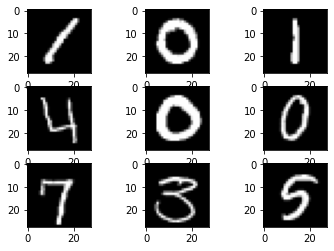

In [ ]:
# plot first 9 image from the training_features data set.
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(training_features[i], cmap=plt.get_cmap('gray'))
plt.show()

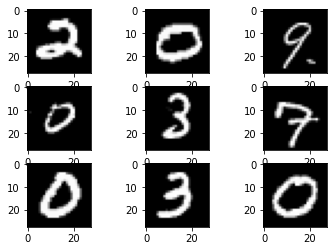

In [ ]:
# First 9 image from the testing_features  data set.
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(testing_features[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
n_classes=10
Y_train = np_utils.to_categorical(training_labels, n_classes)

In [ ]:
model = Sequential()
# convolutional layer
model.add(Conv2D( 25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D( 15, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
#

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 25)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 25)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 15)        3390      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)              

In [ ]:
 model.fit(training_features, Y_train, batch_size=128, epochs=10, validation_split=0.3)

Epoch 1/10
230/230 [==============================] - 16s 64ms/step - loss: 17.4505 - accuracy: 0.3603 - val_loss: 0.8798 - val_accuracy: 0.7499
Epoch 2/10
230/230 [==============================] - 15s 64ms/step - loss: 1.0993 - accuracy: 0.6626 - val_loss: 0.4122 - val_accuracy: 0.8876
Epoch 3/10
230/230 [==============================] - 15s 66ms/step - loss: 0.5803 - accuracy: 0.8267 - val_loss: 0.2449 - val_accuracy: 0.9300
Epoch 4/10
230/230 [==============================] - 15s 65ms/step - loss: 0.3999 - accuracy: 0.8766 - val_loss: 0.1830 - val_accuracy: 0.9438
Epoch 5/10
230/230 [==============================] - 15s 65ms/step - loss: 0.3201 - accuracy: 0.9007 - val_loss: 0.1424 - val_accuracy: 0.9569
Epoch 6/10
230/230 [==============================] - 15s 66ms/step - loss: 0.2640 - accuracy: 0.9166 - val_loss: 0.1153 - val_accuracy: 0.9647
Epoch 7/10
230/230 [==============================] - 15s 64ms/step - loss: 0.2116 - accuracy: 0.9322 - val_loss: 0.0995 - val_accuracy

In [ ]:
pred=model.predict(testing_features)

In [ ]:
pred

array([[2.0955124e-06, 3.6637082e-06, 9.9949062e-01, ..., 3.9310421e-06,
        1.0966531e-04, 1.1342265e-05],
       [9.9957854e-01, 4.3793066e-06, 1.2129808e-04, ..., 1.8669739e-06,
        4.1866719e-05, 1.6760219e-04],
       [2.5326145e-07, 2.5810788e-05, 1.5083912e-03, ..., 1.6229382e-03,
        1.3529065e-03, 9.9475539e-01],
       ...,
       [1.4223108e-09, 2.4507701e-08, 4.2066731e-08, ..., 5.4380799e-08,
        3.5266698e-06, 2.1210789e-07],
       [5.3155695e-06, 3.3795658e-07, 2.4631283e-06, ..., 7.3499111e-03,
        7.0346789e-07, 9.8947221e-01],
       [4.6953364e-06, 7.4146912e-05, 9.9455714e-01, ..., 6.8067442e-05,
        3.0676539e-03, 2.0177510e-04]], dtype=float32)

In [ ]:
predicted_class = np.argmax(pred, axis=-1)

In [ ]:
predicted_class

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
submission=pd.read_csv("/content/sample_submission.csv")

In [ ]:
submission["Label"]=predicted_class

In [ ]:
submission.to_csv("Submission.csv")